In [11]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

%precision %.7g
%matplotlib inline

In [2]:
pop = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/PopDivas_data.csv")
pop.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


# Part 1.

# Explore Data

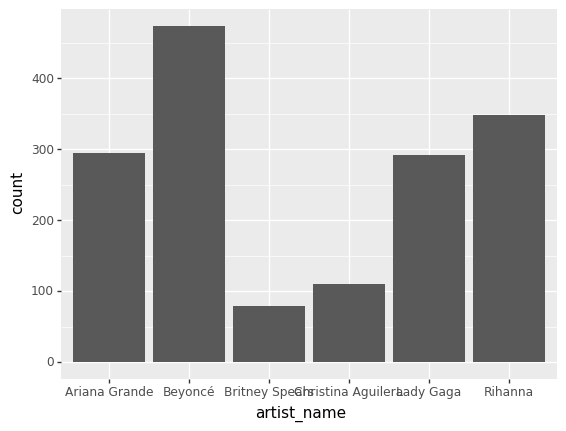

<ggplot: (281356661)>

In [3]:
ggplot(pop, aes("artist_name")) + geom_bar()

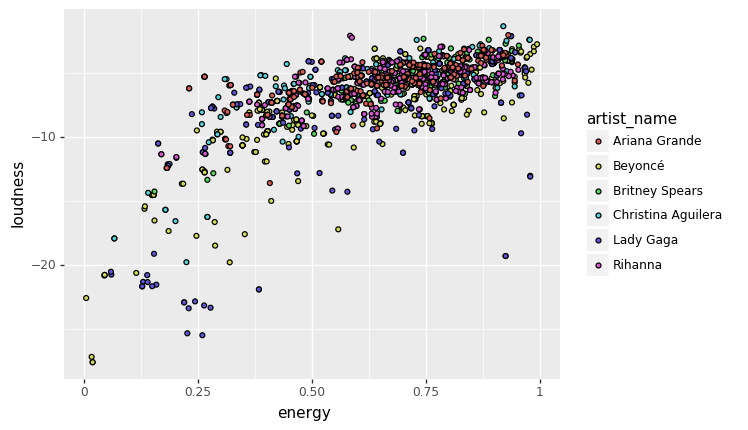

<ggplot: (312516145)>

In [4]:
ggplot(pop, aes("energy", "loudness")) + geom_point(aes(fill = "artist_name"))

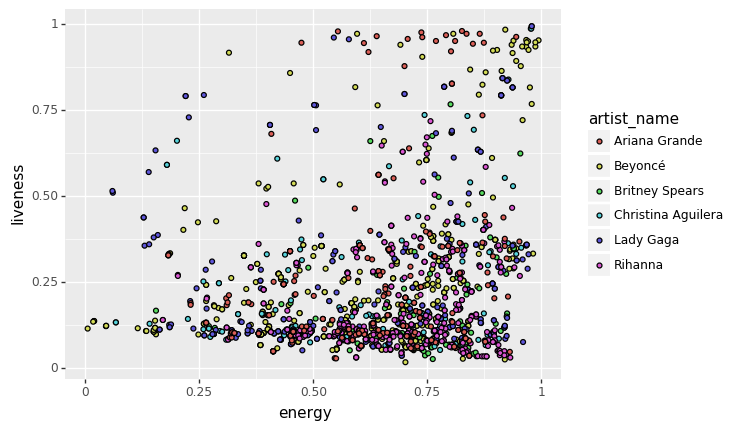

<ggplot: (312543317)>

In [5]:
ggplot(pop, aes("energy", "liveness")) + geom_point(aes(fill = "artist_name"))

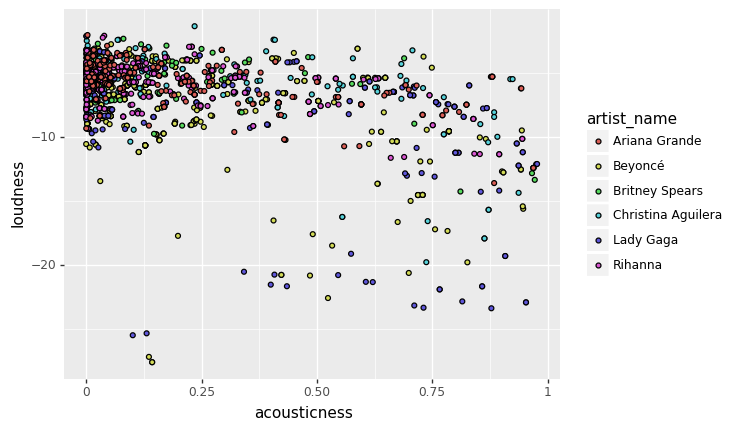

<ggplot: (312542645)>

In [6]:
ggplot(pop, aes("acousticness", "loudness")) + geom_point(aes(fill = "artist_name"))

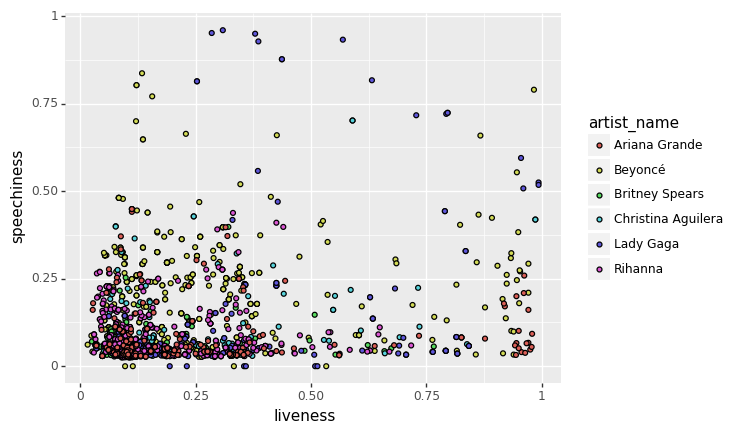

<ggplot: (312769201)>

In [7]:
ggplot(pop, aes("liveness", "speechiness")) + geom_point(aes(fill = "artist_name"))

# Build Model (Decision Tree)

In [8]:
pop.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


I standardized all the variables except "mode","key", and "track_name". This is because all the other variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

Also I decided to include all the variables except "track name" in my model because I felt all could contribute to identifying which artist wrote the song.

For my cross validation, I chose Kfold because I did not want to put my computer through anymore distress. It is getting old, and even though the dataset is only made up of 1600 observations, I still trusted Kfold.

In [13]:
predictors = ["key","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms"]


X = pop[predictors]
y = pop["mode"]

kf = KFold(4, shuffle = True)

acc = []
depth = []
for train, test in kf.split(X):
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    X_train[["danceability","energy","loudness","speechiness","acousticness",
             "instrumentalness","liveness","valence","duration_ms"]] = z.fit_transform(X_train[["danceability","energy","loudness","speechiness","acousticness",
                                                                                                "instrumentalness","liveness","valence","duration_ms"]])
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)

    acc.append(tree.score(X_test,y_test))
    depth.append(tree.get_depth())
    


# Evaluate Model (Decison Tree)

In [14]:
print(acc)
print(np.mean(acc))
print(depth)

[0.4275, 0.465, 0.475, 0.5639097744360902]
0.4828524436090226
[15, 14, 16, 15]


# Build Model (KNN)

In [16]:
predictors = ["key","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms"]

X = pop[predictors]
y = pop["mode"]

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors = n_neighbors)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()
z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

knn.fit(Xz_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Evaluate Model (KNN)

In [17]:
knn.score(Xz_test,y_test)

0.771875

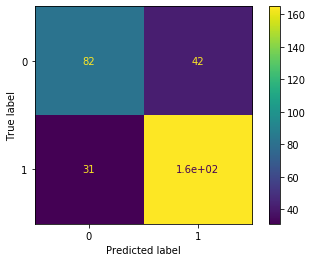

In [18]:
plot_confusion_matrix(knn, Xz_test, y_test)

After using both the Decision Tree model and KNN model, I found that the KNN model was more accurate. Due to the bias in amount of songs for each artist in the dataset, I cannot not accurately identify which model is more affective. We would have to use downsampling inorder to put each artist on a level playing field before we ran out models. 

# Part 2

# Explore Data

In [19]:
youtube = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/YouTubeKidsVideo.csv")
youtube.head()

,kidsVideo,cat,toy,sad,girl,is
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,1,0,0,0,0,0


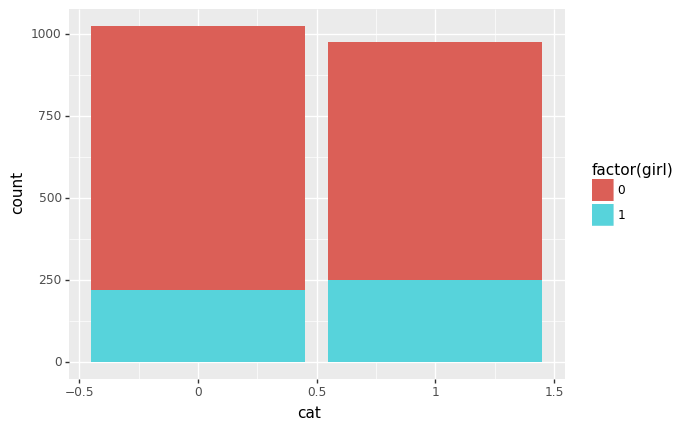

<ggplot: (313666157)>

In [20]:
(ggplot(youtube,aes("cat")) + geom_bar(aes(fill = "factor(girl)")))

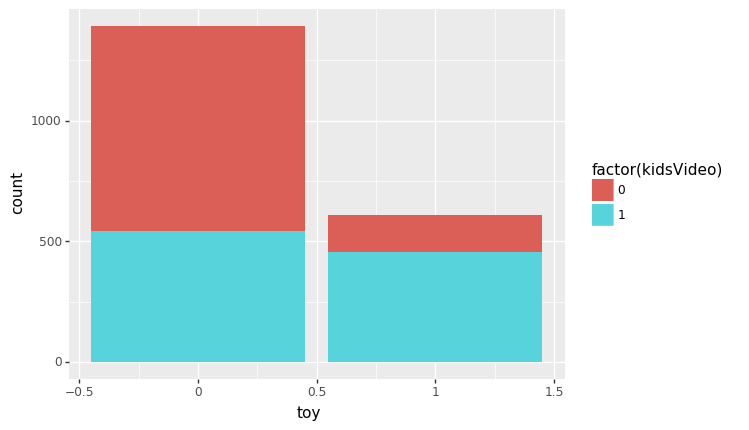

<ggplot: (313672097)>

In [21]:
(ggplot(youtube,aes("toy")) + geom_bar(aes(fill = "factor(kidsVideo)")))

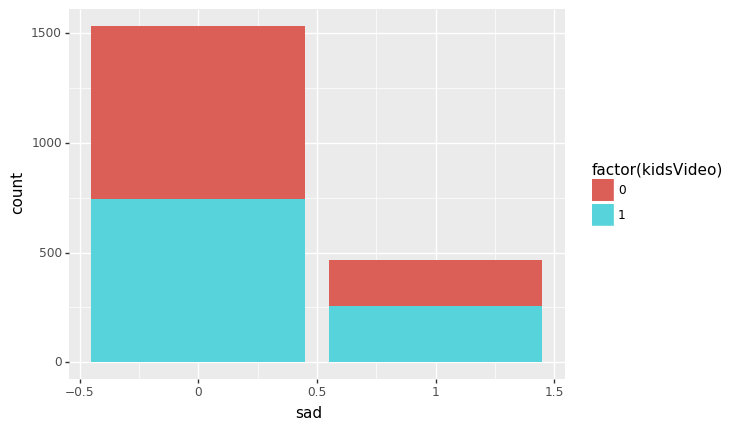

<ggplot: (313672137)>

In [22]:
(ggplot(youtube,aes("sad")) + geom_bar(aes(fill = "factor(kidsVideo)")))

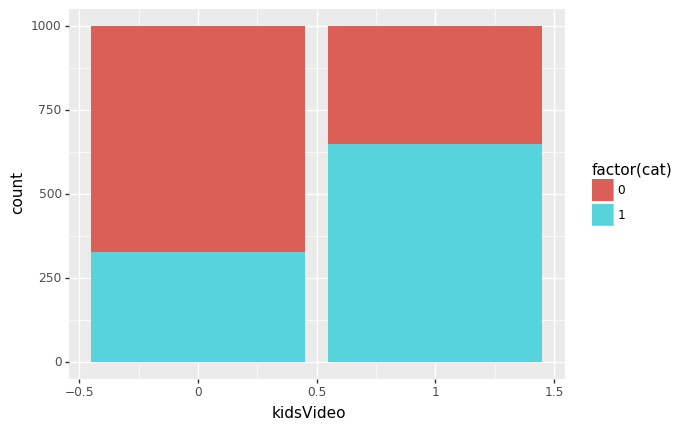

<ggplot: (313812041)>

In [23]:
(ggplot(youtube,aes("kidsVideo")) + geom_bar(aes(fill = "factor(cat)")))

I chose to do a test/training split because we have a pretty large dataset with about 2000 rows, so I wanted to save the computational power it would take to build 5 or 10 k fold models or 2000 LOOCV models. 

I'm including every variable except "is" because this word is irrevalent to kids or adults, there's no clear correlation between the word and predictions, and it'll just ruin the model.

# Build Model

In [24]:
pred = ["girl", "cat", "toy", "sad"]
X = youtube[pred]
y = youtube["kidsVideo"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

In [25]:
nb = CategoricalNB()
nb.fit(X_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evalutate Model

0.6875


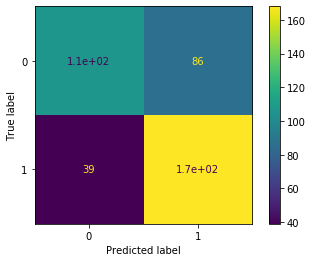

In [26]:
print(nb.score(X_test,y_test))

y_pred = nb.predict(X_test)

plot_confusion_matrix(nb, X_test,y_test)

My model decent. I ended up with an accuracy score of 67.25%. 
I used a confusion matrix to see how many correct and incorrect predictions 
the model made,and there were about 270 correct predictions overall.